# Get data/modules

In [1]:
# utility to download files from google drive without mounting

!git clone https://github.com/chentinghao/download_google_drive.git

Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.


In [2]:
# get the data

!python /content/download_google_drive/download_gdrive.py 1A8b1xKcDzPJJOa6_siD1Q8ChLzw5Kq93 data_en.csv

74.3MB [00:00, 165MB/s]
65.7MB [00:00, 147MB/s]


In [3]:
# package for graphic emojis

!pip install emoji

     |████████████████████████████████| 174 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=5f0bd0f3413e0b0ad16dccc474c9f3dadf856962c74b33d6966dbf1e493ff8c2
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [4]:
# get GPU info

!nvidia-smi

Sun Feb 20 12:04:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Raw text analysis

In [5]:
import os, pickle
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_raw=pd.read_csv("data_en.csv")
df_raw.shape

(1691188, 2)

In [7]:
df_raw.head()

,review,rating
0,Really trash,1
1,This is what asocial media should be.,5
2,Trash,1
3,Login account problem,1
4,Excellent Application.,5


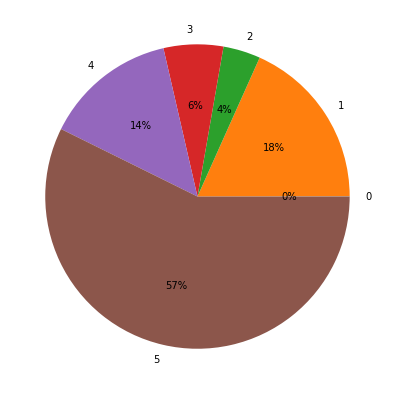

In [8]:
# reviews rating distribution

z=df_raw['rating'].to_list()
q1,q2=np.unique(z, return_counts=True)

plt.figure(figsize=(7,7))
plt.pie(q2, labels=q1, autopct='%.0f%%')
plt.show()

In [9]:
# get words of reviews and word length of each review

def get_words_N_word_count(df_raw):
  word_count_array=[]
  word_array=[]

  for index,row in tqdm(df_raw.iterrows()):
      try:
          review=row['review']
          line=review.strip().lower()
          token_array=line.split()

          N=len(token_array)
          word_count_array.append(N)

          for token in token_array:
              word_array.append(token)
      except:
          pass

  return (word_array, word_count_array)


word_array, word_count_array = get_words_N_word_count(df_raw)

0it [00:00, ?it/s]

In [10]:
q1, q2=np.unique(word_count_array, return_counts=True)

print("Total words in coprpus:\t\t", len(word_array))
print("word length min/max: \t\t",  np.min(q1), np.max(q1))
print("word length frequency min/max: \t", np.min(q2), np.max(q2))

Total words in coprpus:		 13524238
word length min/max: 		 0 456
word length frequency min/max: 	 1 430408


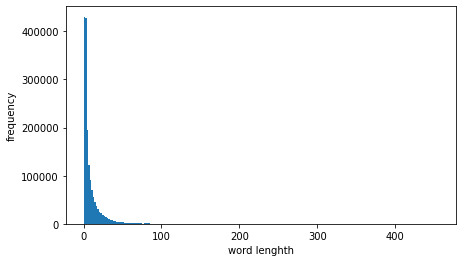

In [11]:
# corpus word count analysis

N=len(np.unique(word_count_array))

plt.figure(figsize=(7,4))
plt.xlabel("word lenghth")
plt.ylabel("frequency")

plt.hist(word_count_array, bins=N); plt.show()

most lines are 10-20 words length

In [12]:
# get words and its frequency in corpus

def get_word_frequency(word_array):
  word_freq={}

  for word in tqdm(word_array):
      if word in word_freq.keys():
          word_freq[word]+=1
      else:
          word_freq[word]=1

  return word_freq


word_freq=get_word_frequency(word_array)
    
print("corpus unique words : ", len(word_freq))

  0%|          | 0/13524238 [00:00<?, ?it/s]

corpus unique words :  320914


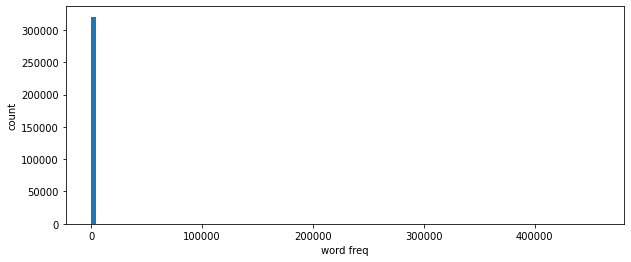

In [13]:
# word-frequency distribution in corpus

wfreq=[ freq for word,freq in word_freq.items() ]
N=100

plt.figure(figsize=(10,4))
plt.xlabel("word freq")
plt.ylabel("count")

plt.hist(wfreq, bins=N); plt.show()

In [15]:
import nltk

nltk.download('stopwords') 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from nltk.corpus import stopwords

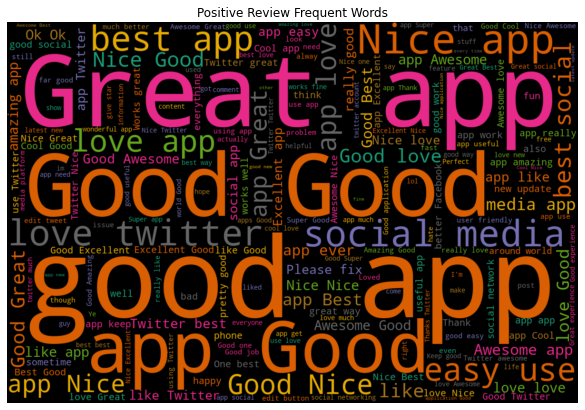

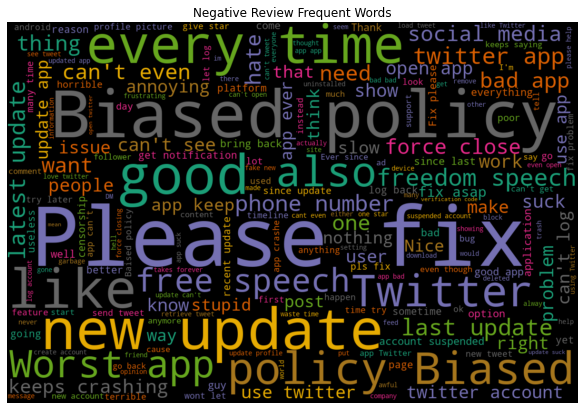

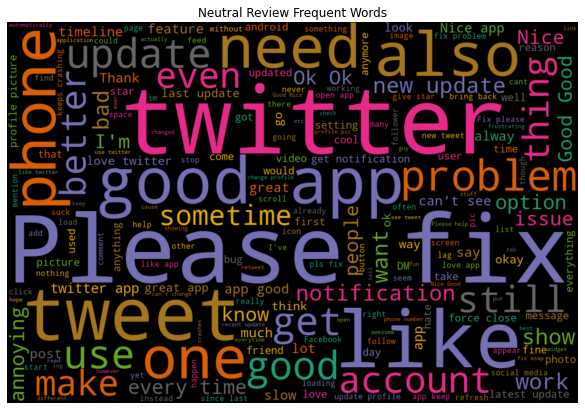

In [18]:
# display frequent words fo both different reviews

def visualize_wordcloud(df, title):
  data=df["review"].dropna()
  data =" ".join([text.strip() for text in data ] )

  stopword_ll = set(stopwords.words("english"))

  plt.figure(figsize=(15,7))
  wc = WordCloud(width=1200, height=800, max_words=200, stopwords=stopword_ll, colormap="Dark2").generate(data)
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title(title)
  plt.show() 


df_postive=df_raw[df_raw['rating']>3]
df_neutral=df_raw[df_raw['rating']==3]
df_negative=df_raw[df_raw['rating']<3]

visualize_wordcloud(df_postive, "Positive Review Frequent Words")
visualize_wordcloud(df_negative, "Negative Review Frequent Words")
visualize_wordcloud(df_neutral, "Neutral Review Frequent Words")

# Imports

In [19]:
import nltk

In [20]:
nltk.download('stopwords') 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import os, re
import numpy as np
import pickle, emoji
import pandas as pd

import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [22]:
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Input, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Data Prepare

## preprocess corpus

In [24]:
text_emoji_map={':-)': 'happy', ':)': 'happy', ':-]': 'happy', ':]': 'happy', ':->': 'happy', ':>': 'happy', '8-)': 'happy', 
                '8)': 'happy', ':-}': 'happy', ':}': 'happy', ':o)': 'happy', ':c)': 'happy', ':^)': 'happy', '=]': 'happy', 
                '=)': 'happy', ":'-)": 'happy', ":')": 'happy', ':"D': 'happy', ':-D': 'laugh', ':D': 'laugh', '8-D': 'laugh', 
                '8D': 'laugh', '=D': 'laugh', '=3': 'laugh', 'B^D': 'laugh', 'c:': 'laugh', 'C:': 'laugh', 'x-D': 'laugh', 'xD': 
                'laugh', 'X-D': 'laugh', 'XD': 'laugh', ':-))': 'very happy', ':-(': 'sad', ':(': 'sad', ':-c': 'sad', ':c': 'sad', 
                ':-<': 'sad', ':<': 'sad', ':-[': 'sad', ':[': 'sad', ':-||': 'sad', '>:[': 'sad', ':{': 'sad', ':@': 'sad', 
                ';(': 'sad', ":'-(": 'cry', ":'(": 'cry', ':=(': 'cry', "D-':": 'horror', 'D:<': 'horror', 'D:': 'horror', 
                'D8': 'horror', 'D;': 'horror', 'D=': 'horror', 'DX': 'horror', ':-O': 'surprise', ':O': 'surprise', ':-o': 'surprise', 
                ':o': 'surprise', ':-0': 'surprise', '8-0': 'surprise', '>:O': 'surprise', '=O': 'surprise', '=o': 'surprise', '=0': 
                'surprise', ':-*': 'kiss', ':*': 'kiss', ':×': 'kiss', ':-P': 'playful', ':P': 'playful', 'X-P': 'playful', 
                'XP': 'playful', 'x-p': 'playful', 'xp': 'playful', ':-p': 'playful', ':p': 'playful', ':-Þ': 'playful', 
                ':Þ': 'playful', ':-þ': 'playful', ':þ': 'playful', ':-b': 'playful', ':b': 'playful', 'd:': 'playful', 
                '=p': 'playful', '>:P': 'playful', ':-/': 'skeptical', ':/': 'skeptical', ':-.': 'skeptical', '>:\\': 'skeptical', 
                '>:/': 'skeptical', ':\\': 'skeptical', '=/': 'skeptical', '=\\': 'skeptical', ':L': 'skeptical', '=L': 'skeptical', 
                ':S': 'skeptical', ':$': 'embarass', '://)': 'embarass', '://3': 'embarass'}


def convert_emoji_to_text(text):
  text=text.lower()
  for text_emoji, mood in text_emoji_map.items():    # text emoji
    text=text.replace(text_emoji, " "+mood+" ")

  text=emoji.demojize(text)                          # graphical emoji
  text=text.replace("::", " ")
  text=text.replace("_", " ")

  return text


In [25]:
def clean_text(text_orig):
  text2=text_orig

  text2=re.sub("[!:;&=\?\[\]\^\|\\,`~{}_/\(\)\"]", " ", text2)  # "text:" -> "text"
  text2=re.sub("#[a-zA-Z]*[0-9]+[a-zA-Z]*", " ", text2)         # #1256 -> ""
  text2=re.sub("[a-zA-Z0-9]*@[a-zA-Z0-9]*", " ", text2)         # acc@mail.com -> "" ; (mail id)
  text2=re.sub("[a-zA-Z0-9]*\+[a-zA-Z0-9]*", " ", text2)        # #1256 -> ""
  text2=re.sub("<[ ]*/?[ ]*[a-zA-Z]*[ ]*/?[ ]*>", " ", text2)   # <br/> -> ""
  text2=re.sub("[<>]", " ", text2)                              # "<<abc>>" -> "text"
  text2=re.sub("\*", " ", text2)                                # "beta***" -> "beta"
  text2=re.sub("#", "", text2)                                  # "sh#" -> "sh"
  text2=re.sub("\-", "", text2)                                 # "un-clear" -> "unclear"
  text2=re.sub("\.", "", text2)                                 # "Dr."" -> "Dr"
  text2=text2.replace("\\", " ")                                # "\x01"" -> "x01"

  text2=re.sub("\$[0-9]+[a-zA-Z]*", " ", text2)                 # $1256 -> ""   ; (money)
  text2=re.sub("\$", " ", text2)                                # "$" -> ""

  text2=re.sub("[0-9]*%", " ", text2)                           # 85% -> ""   ; 
  text2=re.sub("%", " ", text2)                                 # "%" -> ""

  text2=re.sub("n't", " not", text2)                            # wasn't -> was not
  text2=re.sub("'t", " not", text2)                             # have't -> spell mistake
  text2=re.sub("'[ ]*am( |$)", " ", text2)                      # 'am ' am -> ""
  text2=re.sub("'[a-zA-Z0-9]([ ]+|$)", " ", text2)              # '[a-zA-Z] -> 0 ; ('s)
  text2=re.sub("'[a-zA-Z0-9][a-zA-Z0-9]([ ]+|$)", " ", text2)   # '[a-zA-Z][a-zA-Z] -> 0 ; ('ve)
  text2=re.sub("'", " ", text2)                                 # "beta'''" -> "beta"

  text2=re.sub(r'[^\x00-\x7F]+',' ', text2)                     # remove non-ascii characters
  text2=re.sub(r'[^\w ]', '', text2)                            # remove non-words ; \x01 \x08

  text2=re.sub(r"(^[a-zA-Z] )|( [a-zA-Z]$)|(\b[a-zA-Z]\b)", " ", text2)       # I -> ""   
  text2=re.sub("([ ]*|^)[0-9]+([ ]*|^)", " ", text2)            # 5845 -> ""   

  text2=text2.strip()

  return text2


def tokenise_text(text):
  return word_tokenize(text)


def stopwords_removal(tokenized_text):  
  tokenized_text_2=tokenized_text.copy()

  sw=stopwords.words('english')
  excep=[ 'against', 'above', 'below', 'up', 'down', 'on', 'off', 'over', 'under', 'all', 
        'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'no', 'nor', 'not' ]
  for word in tokenized_text:
    if word in excep:
      continue

    if word in sw:
      tokenized_text_2.remove(word)

  return tokenized_text_2


def lemmatize_text(tokenized_text):
  ps = PorterStemmer()
  tokenized_text_2=[ps.stem(word) for word in tokenized_text ]

  return tokenized_text_2
  

In [26]:
def preprocess_text(text):
  text=text.lower()

  text=convert_emoji_to_text(text)
  text=clean_text(text)
  text=tokenise_text(text)
  text=stopwords_removal(text)  
  text=lemmatize_text(text)

  text=' '.join(text)
  return text


In [27]:
#  1 - +ve sentiment
# -1 - -ve sentiment
#  0 -  neutral

def preprocess_corpus(df_orig):
  # rating 4,5 as +ve, 1,2 as -ve and 3 as neutral

  #  1 - +ve sentiment
  # -1 - -ve sentiment
  #  0 -  neutral

  df=df_orig.copy()

  split_ratio=0.8

  df1=df[df.rating==1]
  df2=df[df.rating==2]
  df3=df[df.rating==3]
  df4=df[df.rating==4]
  df5=df[df.rating==5]

  df1["rating"]=-1
  df2["rating"]=-1
  df3["rating"]=0
  df4["rating"]=1
  df5["rating"]=1

  train_ll=[]
  test_ll=[]

  for i in range(1,6):
    df_temp=eval("df"+str(i))
    N=int( df_temp.shape[0] * split_ratio )

    df_tp_train=df_temp.iloc[:N,:]
    df_tp_test =df_temp.iloc[N:,:]

    train_ll.append(df_tp_train)
    test_ll.append(df_tp_test)

  # ------------------------------------------------

  df_train=pd.concat(train_ll, axis=0)
  df_test=pd.concat(test_ll, axis=0)

  df_train = df_train.sample(frac=1).reset_index(drop=True)
  df_test = df_test.sample(frac=1).reset_index(drop=True)

  train_X=[]
  train_Y=[]
  test_X=[]
  test_Y=[]

  for _, row in tqdm(df_train.iterrows()):   
    try: 
      text=row['review']
      sentiment=row['rating']
      pr_text=preprocess_text(text)
      
      train_X.append(pr_text)
      train_Y.append(sentiment)
    except:
      pass

  for _, row in tqdm(df_test.iterrows()):
    try:
      text=row['review']
      sentiment=row['rating']
      pr_text=preprocess_text(text)

      test_X.append(pr_text)
      test_Y.append(sentiment)
    except:
      pass

  return (train_X, train_Y, test_X, test_Y)


In [28]:
# process corpus data
train_corpus, train_sent, test_corpus, test_sent= preprocess_corpus(df_raw)

len(train_corpus), len(train_sent), len(test_corpus), len(test_sent)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

0it [00:00, ?it/s]

0it [00:00, ?it/s]

(1352534, 1352534, 333606, 333606)

## prepare corpus

In [29]:
def select_vocabulary(corpus, vocabulary_size):
  # get all words in corpus and select top frequent words as vocabulary

  # get all words in an array
  word_array=[]

  for review in tqdm(corpus):
      try:
          line=review.strip().lower()
          tokens=line.split()

          for token in tokens:
              word_array.append(token)
      except:
        pass

  # determine word frequency
  word_freq={}

  for word in tqdm(word_array):
      if word in word_freq.keys():
          word_freq[word]+=1
      else:
          word_freq[word]=1

  # sort words based on frequency
  word_freq_array=[ (word, freq) for word,freq in word_freq.items()  ]
  word_freq_array=sorted(word_freq_array, key=lambda x: x[1], reverse=True)

  print(len(word_freq_array))

  # select words for vocabulary
  vocabulary=word_freq_array[:vocabulary_size]
  vocabulary={ word for (word,freq) in vocabulary }

  return vocabulary


In [30]:
vocabulary_size=20_000
vocabulary=select_vocabulary(train_corpus, vocabulary_size)

  0%|          | 0/1352534 [00:00<?, ?it/s]

  0%|          | 0/6887725 [00:00<?, ?it/s]

103540


In [31]:
# word_index mapping

word_ind_map={}

for i,word in enumerate(vocabulary):
  word_ind_map[word]=i

len(word_ind_map) 

20000

In [33]:
# process corpus with respect to vocabulary

processed_train_corpus=[]

for index, line in tqdm( enumerate(train_corpus) ):
    line_wll=line.split()
    pr_line_wll=[]
    for word in line_wll:
      if word not in vocabulary:
        continue
      pr_line_wll.append(word)

    line2=""
    for word in pr_line_wll:
      line2+=" "+word
    line2=line2.strip()

    processed_train_corpus.append(line2)


0it [00:00, ?it/s]

## BOW vectorization

In [34]:
# convert text data to numeric data in BOW form
# and save them in pickle because of larger size

def vectorize_data(corpus, sentiment_class, word_ind_map, vocabulary_size, dest_fol, reviews_per_file=20_000):
  # INPUT:
  #   corpus:           text data list
  #   sentiment_class:  sentiment value list
  #   word_ind_map:     word to index map for vocabulary
  #   vocabulary_size:  total words used for model
  #   dest_fol:         path to save processed data
  #   review_per_file:  no of reviews to save in one file

  L=len(corpus)  
  # c=0

  count=1
  for i in tqdm( range(0, L, reviews_per_file) ):
    j=min(i+reviews_per_file, L)
    size=j-i
    data=np.zeros((size, vocabulary_size+1), dtype=np.uint8)

    for z,line in enumerate(corpus[i:j]):
      for word in line.strip().split():
        try:
          ind=word_ind_map[word]
          data[z, ind]+=1
        except:
          pass
      data[z,-1]=sentiment_class[i+z]+1
      # data[z,-1]=c; c+=1


    dest_path=os.path.join(dest_fol, str(count)+".pkl")
    fd=open(dest_path, "wb")
    pickle.dump(data, fd)
    fd.close()

    count+=1

  return 


In [35]:
!mkdir "/content/data/train" "/content/data/test" -p

In [37]:
train_data_fol="/content/data/train"
test_data_fol= "/content/data/test"

reviews_per_file=20_000

# vectorize train data

vectorize_data(processed_train_corpus, train_sent, word_ind_map, vocabulary_size, train_data_fol, reviews_per_file)

  0%|          | 0/68 [00:00<?, ?it/s]

In [38]:
# vectorize test data

vectorize_data(test_corpus, test_sent, word_ind_map, vocabulary_size, test_data_fol, reviews_per_file)

  0%|          | 0/17 [00:00<?, ?it/s]

# Dataset

In [39]:
class Dataset(keras.utils.Sequence):

  def __init__(self, data_fol, batch, reviews_per_file, total_reviews, no_of_classes):
    self.data_fol=data_fol
    self.batch=batch
    self.reviews_per_file=reviews_per_file
    self.no_of_classes=no_of_classes

    self.T=total_reviews

  def __getitem__(self, index):
    i=index*self.batch
    j= min( (index+1)*self.batch, self.T)

    X=[]
    Y=[]

    first=i
    last=min( (i-(i%self.reviews_per_file)+self.reviews_per_file ), j)
    while last<=j and first!=last:
      fname=int(first/self.reviews_per_file)+1
      base_index=(fname-1)*self.reviews_per_file

      pkl_path=os.path.join(self.data_fol, str(fname)+".pkl")
      np_data=pickle.load(open(pkl_path, "rb"))

      i1=first-base_index
      j1=last-base_index

      data_x=np_data[i1:j1, :-1]
      data_y_ind=np_data[i1:j1, -1] 

      N=data_x.shape[0]
      data_y=np.zeros( (N, self.no_of_classes), dtype=np.uint8)
      data_y[ np.arange(N), data_y_ind ]=1
      
      X.append(data_x)
      Y.append(data_y)

      first=last
      last=min(first+self.reviews_per_file, j)

    X=np.concatenate(X, axis=0)
    Y=np.concatenate(Y, axis=0)

    return (X,Y)

  def __len__(self):
    N=int(self.T/self.batch)
    return N


In [40]:
batch=30_000
N_classes=3

train_total_reviews=len(processed_train_corpus)
test_total_reviews=len(test_corpus)

train_dataset=Dataset(train_data_fol, batch, reviews_per_file, train_total_reviews, N_classes)
test_dataset=Dataset(test_data_fol, batch, reviews_per_file, test_total_reviews, N_classes)

# Model

In [42]:
def create_model(vocabulary_size, no_classes):

  inp=Input(shape=(vocabulary_size, ))
  x=inp
  x=Dense(no_classes, activation="softmax")(x)

  model=Model(inp, x)
  return model


In [43]:
K.clear_session()
model=create_model(vocabulary_size, N_classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense (Dense)               (None, 3)                 60003     
                                                                 
Total params: 60,003
Trainable params: 60,003
Non-trainable params: 0
_________________________________________________________________


In [44]:
loss="categorical_crossentropy"

model.compile(optimizer=Adam(learning_rate=1E-2), loss=loss, metrics="accuracy")

# Training

In [45]:
steps_per_epoch=len(train_dataset)
epochs=20

print(steps_per_epoch, len(test_dataset))

history=model.fit_generator(train_dataset, 
                            steps_per_epoch=steps_per_epoch,
                            epochs=epochs,
                            validation_data=test_dataset,
                            validation_steps=len(test_dataset),
                            )

45 11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
45/45 [==============================] - 706s 16s/step - loss: 0.7249 - accuracy: 0.8213 - val_loss: 0.6023 - val_accuracy: 0.8214
Epoch 2/20
45/45 [==============================] - 890s 20s/step - loss: 0.4959 - accuracy: 0.8493 - val_loss: 0.5342 - val_accuracy: 0.8281
Epoch 3/20
45/45 [==============================] - 886s 20s/step - loss: 0.4498 - accuracy: 0.8582 - val_loss: 0.5153 - val_accuracy: 0.8293
Epoch 4/20
45/45 [==============================] - 901s 20s/step - loss: 0.4320 - accuracy: 0.8610 - val_loss: 0.5070 - val_accuracy: 0.8305
Epoch 5/20
45/45 [==============================] - 896s 20s/step - loss: 0.4230 - accuracy: 0.8623 - val_loss: 0.5016 - val_accuracy: 0.8313
Epoch 6/20
45/45 [==============================] - 876s 19s/step - loss: 0.4176 - accuracy: 0.8635 - val_loss: 0.4991 - val_accuracy: 0.8318
Epoch 7/20
45/45 [==============================] - 903s 20s/step - loss: 0.4142 - accuracy: 0.8642 - val_loss: 0.4977 - val_accuracy: 0.8327
Epoch 

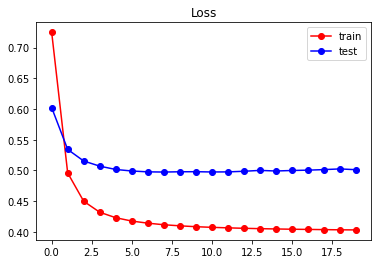

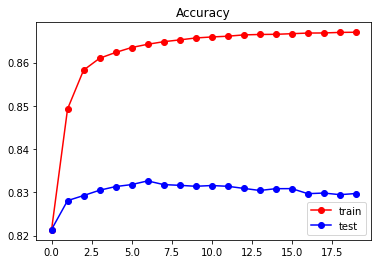

In [46]:
# metric/loss plotting

loss=history.history['loss']
test_loss=history.history['val_loss']
acc=history.history['accuracy']
test_acc=history.history['val_accuracy']

plt.plot(loss, '-ro')
plt.plot(test_loss, '-bo')
plt.legend(['train', 'test'])
plt.title("Loss")
plt.show()

plt.plot(acc, '-ro')
plt.plot(test_acc, '-bo')
plt.legend(['train', 'test'])
plt.title("Accuracy")
plt.show()

The accuracy acheived during training is 83%